<a href="https://colab.research.google.com/github/Haoliang04/JSC270/blob/main/JSC270_2025_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1: DELVE COVID data

## Learning objectives:

1.   Understanding the DELVE COVID-19 dataset and how it is displayed in the current notebook
2.   Modifying code to update figures
3.   Reading in, wrangling, and plotting data on your own!

# Part I: DELVE COVID-19 Data Visualization (20 pts)

###Go to https://rs-delve.github.io/data_software/global-dataset.html and read about the DELVE Global COVID-19 Dataset.

###Open the python notebook which was used to produce the data exploration on the DELVE website ([here](https://colab.research.google.com/github/rs-delve/covid19_datasets/blob/master/Data_Exploration.ipynb)) and review the code that was used.

###Now read the DELVE data into colab
####Hint: double clicking on the code cells in the DELVE colab, it will show you the code (i.e. the notebook is set to hide the code), you can copy that cell's content ant paste it in the code cell below

In [127]:
#@title Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output, display
import ipywidgets as widgets
from datetime import datetime, date, timedelta

path = 'https://raw.githubusercontent.com/rs-delve/covid19_datasets/master/dataset/combined_dataset_latest.csv'
df = pd.read_csv(path, parse_dates=['DATE'])


###Explore the columns of the dataframe using .describe()

In [ ]:
df.describe()

,DATE,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,npi_income_support,...,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
count,156145,152853.000000,152841.000000,152842.000000,152791.000000,152814.000000,152790.000000,152791.000000,152822.000000,152769.000000,...,1.369400e+05,4232.000000,608.000000,37720.000000,37720.000000,37720.000000,37720.000000,37720.000000,37720.000000,37720.000000
mean,2021-02-21 00:00:00.000000512,1.491047,1.379205,1.341006,2.525967,0.529094,0.957419,0.775419,2.340246,0.762877,...,6.933605e+06,118.685821,824.492783,0.000036,0.011411,189.244193,19.340536,15.662197,23.382182,3.510201
min,2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.130000e+03,-298.634510,-2090.441573,0.000000,0.000382,0.240429,-28.269835,-36.281255,-19.346130,0.781301
25%,2020-07-27 00:00:00,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,4.656155e+05,-5.085714,-37.800000,0.000001,0.006594,156.161128,13.695513,9.219760,18.128939,2.255559
50%,2021-02-21 00:00:00,1.000000,2.000000,2.000000,3.000000,0.000000,1.000000,0.000000,2.000000,1.000000,...,1.512602e+06,43.527889,301.363483,0.000011,0.011403,202.137401,21.727503,17.443256,26.173631,3.034009
75%,2021-09-18 00:00:00,3.000000,2.000000,2.000000,4.000000,1.000000,2.000000,2.000000,3.000000,1.000000,...,5.448268e+06,164.988925,1152.323174,0.000043,0.016318,234.790844,26.429332,23.607332,29.594597,4.190054
max,2022-04-14 00:00:00,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,...,2.004801e+08,1835.824117,12850.768820,0.002657,0.025842,389.408752,39.779094,35.386502,47.689189,19.476713
std,NaN,1.125447,0.969666,0.788743,1.548291,0.687834,0.924409,0.895428,1.216564,0.765605,...,2.096006e+07,242.809764,1698.439041,0.000068,0.005347,64.843065,9.008982,9.374045,9.188666,1.844418


###Now create a new dataframe summarizing average values for each country in each column and display it in the notebook



In [ ]:
new_df_by_country = df.groupby('country_name').mean(numeric_only=True)
new_df_by_country

,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,npi_income_support,npi_debt_relief,...,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
country_name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.233939,1.499394,1.128485,0.848485,0.696970,0.426667,0.448485,1.667879,0.000000,0.037576,...,9292896.0,NaN,NaN,0.000021,0.005995,185.438330,13.614276,7.350657,19.730927,2.427583
Albania,1.675373,1.319652,1.532338,3.164179,0.378109,1.529851,0.470149,1.713930,0.936567,1.046020,...,302886.0,NaN,NaN,0.000031,0.007237,179.588922,13.379447,8.698013,18.531704,2.181171
Algeria,1.356971,1.550481,1.554087,3.435096,1.235577,1.423077,0.906250,2.826923,0.393029,1.104567,...,7766182.0,NaN,NaN,0.000014,0.008208,193.742416,17.430347,12.708320,22.455916,3.471161
Andorra,1.078125,1.495192,1.259615,2.656250,0.783654,0.206731,0.051683,1.580529,1.793269,1.262019,...,NaN,NaN,NaN,0.000030,0.006175,177.429576,6.740901,1.786306,11.818287,1.703644
Angola,1.074789,1.835947,1.338963,2.880579,0.811821,1.148372,1.463209,2.867310,0.143546,0.221954,...,5698765.0,NaN,NaN,0.000036,0.016167,199.819331,24.547785,21.878891,27.995213,2.649455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,1.978182,1.922424,1.583030,2.958788,1.327273,1.318788,1.527273,3.202424,0.447273,0.489697,...,14309682.0,NaN,NaN,0.000038,0.016976,187.507023,25.915867,22.974523,29.811969,3.119722
"Virgin Islands, U.S.",1.833738,1.075243,0.898058,2.584951,0.120146,0.765777,0.330097,0.908981,0.649272,0.433252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,1.069091,0.766061,0.739394,0.000000,0.000000,1.436364,0.796364,2.395152,0.000000,0.000000,...,6417807.0,NaN,NaN,0.000017,0.012250,211.079073,22.518829,17.413003,28.410415,3.660751


###Copy the code which generates the "Timline of NPI Introduction for Selected Countries" graph and comment each command describing what was done, e.g.:



```
## add a column to plot_df which replaces the npi name with its enumerated index value
plot_df['value'] = plot_df.NPI.map({npi: i for i, npi in enumerate(npis)})
```



###Next, change the colors on the graph to group NPIs with the same color in the following way:
* all canceling/closures (e.g. "npi_cancel_public_events", "npi_school_closing","npi_close_public_transport", "npi_workplace_closing")
* all money-related interventions (e.g. "npi_income_support")
* all testing and PPE interventions (e.g. "npi_contact_tracing", "npi_masks")
* remaining NPIs (e.g. "npi_internal_movement_restrict")

######Hint: create a new column in plot_df that you can use for the 'hue' argument in the sns.relplot function

###Comment the code you added to make this change

### You can include your comments and change in the cell below.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


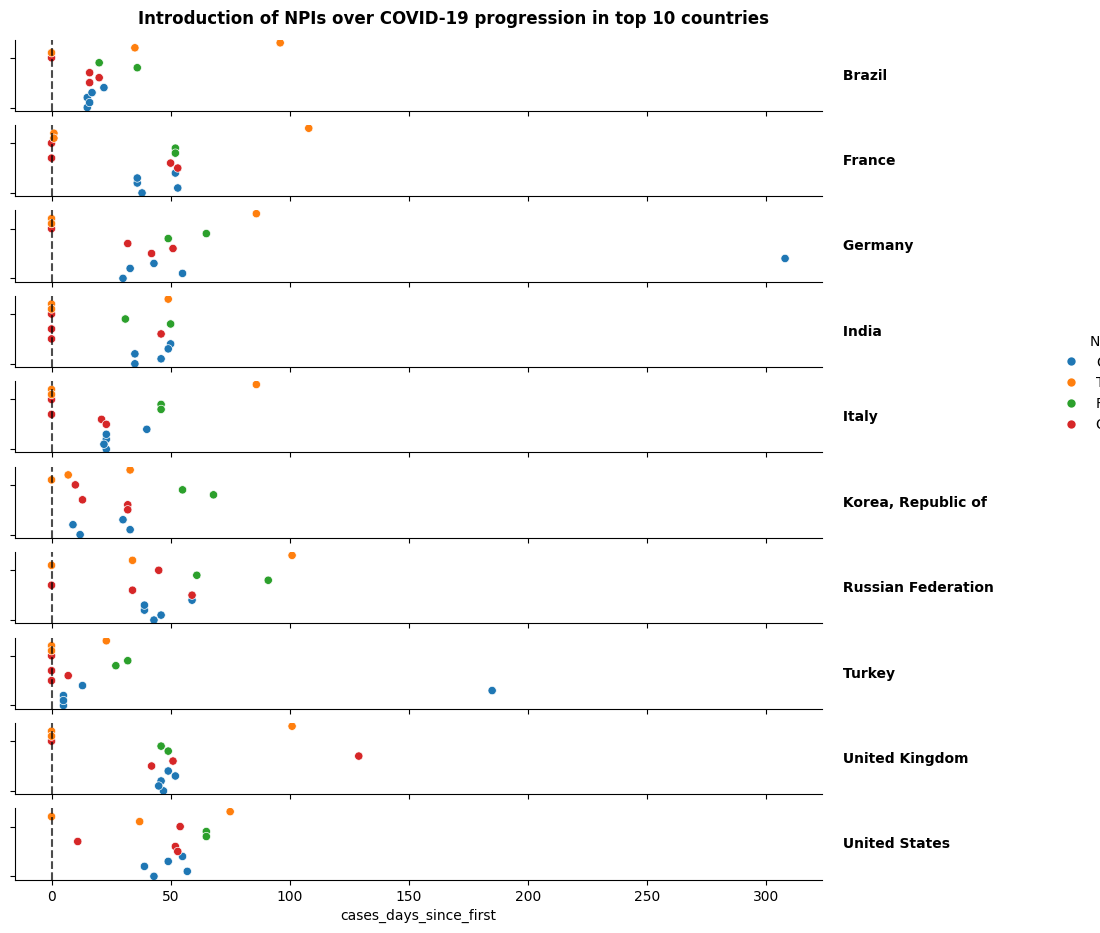

In [ ]:
#@title Timeline Plot

## Create a list of NPIs that are being analyzed.
npis = [
        'npi_school_closing',
        'npi_workplace_closing',
        'npi_cancel_public_events',
        'npi_gatherings_restrictions',
        'npi_close_public_transport',
        'npi_stay_at_home',
        'npi_internal_movement_restrictions',
        'npi_international_travel_controls',
        'npi_income_support',
        'npi_debt_relief',
        'npi_public_information',
        'npi_testing_policy',
        'npi_contact_tracing',
        'npi_masks',
]

## Create a list of index that contains 10 names in 'country_name' which has highest value in 'case_total'.
countries = df.groupby('country_name').cases_total.max().nlargest(10).index

## Create a new dataframe plot_df to include any rows which 'country_name' is in countries and only take 16 columns in the 'country_name', 'cases_days_since_first' and list npis.
## Then take 'country_name' and 'cases_days_since_first' as identifier variables, while all other columns are unpivoted to the row axis and set thier name to NPI.
plot_df = df[df.country_name.isin(countries)][['country_name', 'cases_days_since_first'] + npis].melt(id_vars=['country_name', 'cases_days_since_first'], var_name='NPI')

## Sort the plot_df by 'country_name' and 'cases_days_since_first'.
plot_df = plot_df.sort_values(['country_name', 'cases_days_since_first'])

## Select any rows which 'value' is greater than 0 and group by 'country_name' and 'NPI', while the 'country_name' and 'NPI' columns stay as normal columns.
## Then find the the minimum value of 'cases_days_since_first' and 'value'.
plot_df = plot_df[plot_df['value'] > 0].groupby(['country_name', 'NPI'], as_index=False).min()

## New code for npi categories ##
## Create a dictionary to classify 4 types.
npi_categories = {
    'npi_school_closing': 'Closures',
    'npi_workplace_closing': 'Closures',
    'npi_cancel_public_events': 'Closures',
    'npi_gatherings_restrictions': 'Closures',
    'npi_close_public_transport': 'Closures',
    'npi_income_support': 'Financial Support',
    'npi_debt_relief': 'Financial Support',
    'npi_contact_tracing': 'Testing & PPE',
    'npi_masks': 'Testing & PPE',
    'npi_testing_policy': 'Testing & PPE',
    'npi_stay_at_home': 'Other NPIs',
    'npi_internal_movement_restrictions': 'Other NPIs',
    'npi_international_travel_controls': 'Other NPIs',
    'npi_public_information': 'Other NPIs',
}

## Add a new column to plot_df which replaces the npi name with its corresponding category.
plot_df['NPI_Category'] = plot_df['NPI'].map(npi_categories)
## End ##

## Add a column to plot_df which replaces the npi name with its enumerated index value.
plot_df['value'] = plot_df.NPI.map({npi: i for i, npi in enumerate(npis)})

## Create a scatter plot using circular markers of 'value' vs 'cases_days_since_first', seperate plot row by 'country_name', colored by 'NPI_Category' in plot_df.
## Height of each subplot is 1; Aspect ratio is 10; Titles in the margin outside subplots; Legend placed outside the figure; Removes unnecessary plot borders.
g = sns.relplot(data=plot_df,
                x='cases_days_since_first',
                y='value',
                hue='NPI_Category',
                row='country_name',
                kind='scatter',
                height=1,
                aspect=10,
                marker='o',
                facet_kws=dict(margin_titles=True, legend_out=True, despine=True))

## Customize each subplot by removing default title and adding custom annotations.
for ax in g.axes.flat:
  txt = ax.texts[0]

  ## Extract the country name from facet title.
  ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
          txt.get_text().split('=')[1],
          transform=ax.transAxes,
          va='center',
          fontweight='bold')

  ## Remove default facet title.
  ax.texts[0].remove()

  ## Remove y-axis label.
  ax.set_ylabel(None)

  ## Remove y-axis tick labels.
  ax.set_yticklabels([])

  ## Add a vertical reference line at day 0.
  ax.axvline(0, ls='--', c='k', alpha=0.7)

## Set the main title for the entire figure.
g.fig.suptitle('Introduction of NPIs over COVID-19 progression in top 10 countries', fontweight='bold')

## Adjust the legend position to the right side of the plot.
leg = g._legend
leg.set_bbox_to_anchor([1.05, 0.55])

## Adjust subplot layout to make space for the title.
plt.subplots_adjust(top=0.95)

## Display the final plot.
plt.show()

###In the DELVE data exploration, they add a widget to allow the user to select only data from a specific country to display. Let's add a widget here and only show the data from one country. It's okay if your country-specific graph is simpler than the ones above (e.g. no dashed horizontal line).

In [ ]:
# Create a dropdown widget for country selection
country_dropdown = widgets.Dropdown(
    options=plot_df['country_name'].unique(),  # Unique country names
    description='Country:',
    value=plot_df['country_name'].unique()[0],  # Default to the first country
    style={'description_width': 'initial'}
)

# Function to update the plot based on the selected country
def update_plot(selected_country):
    country_data = plot_df[plot_df['country_name'] == selected_country]

    # Create a scatter plot for the selected country
    plt.figure(figsize=(12, 6))
    sns.scatterplot(
        data=country_data,
        x='cases_days_since_first',
        y='value',
        hue='NPI_Category',
        palette='tab10'
    )

    plt.title(f'NPIs Over COVID-19 Progression in {selected_country}', fontweight='bold')
    plt.xlabel('Days Since First Case')
    plt.ylabel('NPI Index')
    plt.legend(title='NPI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Display the widget and update the plot when a new country is selected
interactive_plot = widgets.interactive(update_plot, selected_country=country_dropdown)
display(interactive_plot)

interactive(children=(Dropdown(description='Country:', options=('Brazil', 'France', 'Germany', 'India', 'Italy…

# Part II: Create your own COVID-19 Data Visualization
* 20 pts for the code + description in this notebook
* 20 pts for the 2 pg summary

###Now find a COVID-19 dataset available online on your own.  Feel free to use whatever data you would like.  If you are having trouble finding data, you can take a look at the sources below:

* The U of T library COVID-19 data resource list: https://mdl.library.utoronto.ca/covid-19/data.

* Google open COVID-19 data repository: https://health.google.com/covid-19/open-data/raw-data.

* Ontario data catalog: https://data.ontario.ca/en/organization/health.

* Kaggle: https://www.kaggle.com.

###Read the data into this notebook and create a figure with a widget that allows users to interact with the graph.  Also, write a caption in the notebook describing the figure you've created.



## Figure Caption:
* The interactive figure above displays the impact of different Non-Pharmaceutical Interventions (NPIs) types on the number of COVID-19 cases and deaths in Ontario, Canada.
* Users can select an NPI types(Closures, Financial Support, Testing & PPE, Other NPIs) from the dropdown menu to explore how its implementation correlated with changes in daily new cases and deaths over time. The green line represents the selected NPI's restriction level (0 = None, 5 = Maximum restriction), while the blue and red lines show daily new cases and deaths, respectively.

In [151]:
# Load the data
path = 'https://storage.googleapis.com/covid19-open-data/v3/location/CA_ON.csv'
df = pd.read_csv(path, parse_dates=['date'])

# Select relevant columns for analysis
relevant_columns = [
    'date', 'new_confirmed', 'new_deceased',
    'restrictions_on_gatherings', 'restrictions_on_internal_movement',
    'school_closing', 'workplace_closing', 'cancel_public_events',
    'stay_at_home_requirements', 'income_support', 'testing_policy',
    'public_transport_closing', 'international_travel_controls', 'debt_relief',
    'vaccination_policy', 'contact_tracing', 'public_information_campaigns'
]

npi_categories = {
    'school_closing': 'Closures',
    'workplace_closing': 'Closures',
    'cancel_public_events': 'Closures',
    'restrictions_on_gatherings': 'Closures',
    'public_transport_closing': 'Closures',

    'income_support': 'Financial Support',
    'debt_relief': 'Financial Support',

    'vaccination_policy': 'Testing & PPE',
    'contact_tracing': 'Testing & PPE',
    'testing_policy': 'Testing & PPE',

    'stay_at_home_requirements': 'Other NPIs',
    'restrictions_on_internal_movement': 'Other NPIs',
    'international_travel_controls': 'Other NPIs',
    'public_information_campaigns': 'Other NPIs'
}

df = df[relevant_columns].dropna()

# Add a new column to classify NPIs into categories
df_melted = df.melt(id_vars=['date', 'new_confirmed', 'new_deceased'],
                    value_vars=npi_categories.keys(),
                    var_name='NPI',
                    value_name='NPI_Level')

df_melted['NPI_Category'] = df_melted['NPI'].map(npi_categories)

# Create a dropdown widget to select NPI categories
category_dropdown = widgets.Dropdown(
    options=['Closures', 'Financial Support', 'Testing & PPE', 'Other NPIs'],
    description='Select NPI Category:',
    value='Closures',
    style={'description_width': 'initial'}
)

# Function to update the plot based on selected NPI
def update_plot(selected_category):
    # Filter data based on the selected category
    category_data = df_melted[df_melted['NPI_Category'] == selected_category]

    # Calculate mean NPI level per day
    mean_npi_data = category_data.groupby('date')['NPI_Level'].mean().reset_index()

    plt.figure(figsize=(12, 6))

    # Plot NPI level over time on the primary y-axis
    ax1 = sns.lineplot(
        data=category_data,
        x='date',
        y='NPI_Level',
        hue='NPI',  # Different lines for each NPI
        linestyle='--',
        linewidth=1

    )

    # Overlay mean NPI level over time as a bold dashed line
    sns.lineplot(
        data=mean_npi_data,
        x='date',
        y='NPI_Level',
        color='black',
        alpha=0.6,   # Make individual NPI lines slightly transparent
        linewidth=2,
        label=f'{selected_category} (Mean Level)'
    )
    ax1.set_ylabel('NPI Level (0-5)', color='green')
    ax1.set_yticks([0, 1, 2, 3, 4, 5])  # Set discrete tick values
    ax1.set_ylim(-0.1, 5.2)  # Add margin to avoid overlap

    # Overlay new confirmed cases and new deceased on secondary y-axis
    ax2 = ax1.twinx()
    line1, = ax2.plot(df['date'], df['new_confirmed'], color='blue', label='New Cases')
    line2, = ax2.plot(df['date'], df['new_deceased'], color='red', label='New Deaths')
    ax2.set_ylabel('Number of Cases/Deaths')
    ax2.margins(y=0.02)  # Add margins to avoid cutoff
    plt.title(f'Impact of {selected_category} on COVID-19 Cases and Deaths in Ontario', fontweight='bold')
    plt.xlabel('Date')

    # Combine legends from both axes and place in the upper left
    lines_1, labels_1 = ax1.get_legend_handles_labels()  # Get legend from ax1 (NPI)
    lines_2, labels_2 = ax2.get_legend_handles_labels()  # Get legend from ax2 (Cases/Deaths)

    ax1.legend(lines_1 + [line1, line2], labels_1 + labels_2, loc='upper left', bbox_to_anchor=(1.1, 1), title='Lables')

    plt.show()

# Display the widget and link it to the plotting function
interactive_plot = widgets.interactive(update_plot, selected_category=category_dropdown)
display(interactive_plot)

interactive(children=(Dropdown(description='Select NPI Category:', options=('Closures', 'Financial Support', '…

### Write a 2-page, double spaced report with the following sections:
* Background: Description of the data you found
* Motivation:  Goal of your visualization
* Methods:  A summary of the visualization you created of the data
* Conclusion: Conclusions or findings indicated by the visualization you have created

### When you are finished, turn in this notebook and the pdf of your report to Quercus.


